<a href="https://colab.research.google.com/github/PPKoller/2x2-FNAL/blob/master/eBay_cars_FCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [49]:
import pandas as pd
import numpy as np
!pip install category_encoders

df = pd.read_csv('/content/gdrive/My Drive/AMAG/Data/eBay_cars/cars_use_case_clean.csv', index_col=0)
#amag = ['Volkswagen', 'Audi', 'Skoda', 'Seat', 'Porsche']
#df = df.loc[df.brand.isin(amag)]
df.head(125585)

,seller,offerType,price,abtest,vehicleType,gearbox,powerPS,kilometer,fuelType,notRepairedDamage,postalCode,age,brand,model
3,privat,Angebot,1500,test,kleinwagen,manuell,75,150000,benzin,nein,91074,14.750000,Volkswagen,golf
4,privat,Angebot,3600,test,kleinwagen,manuell,69,90000,diesel,nein,60437,7.750000,Skoda,fabia
6,privat,Angebot,2200,test,cabrio,manuell,109,150000,benzin,nein,67112,11.666667,Peugeot,206
10,privat,Angebot,2000,control,limousine,manuell,105,150000,benzin,nein,96224,11.333333,Mazda,3
11,privat,Angebot,2799,control,kombi,manuell,140,150000,diesel,ja,57290,10.333333,Volkswagen,passat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242158,privat,Angebot,280,control,bus,automatik,150,150000,benzin,ja,81829,18.750000,Chrysler,voyager
242159,privat,Angebot,4900,test,limousine,manuell,170,150000,diesel,nein,48529,9.916667,Volkswagen,golf
242162,privat,Angebot,5500,control,bus,automatik,116,125000,benzin,nein,53783,11.000000,Volkswagen,touran
242163,privat,Angebot,1850,test,kombi,manuell,90,150000,diesel,nein,65931,16.166667,Volkswagen,golf


In [50]:
from sklearn.preprocessing import MinMaxScaler

scale_cat = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

#scaler = MinMaxScaler()
#df_scaled = scaler.fit_transform(df[scale_cat])
#df[scale_cat] = pd.DataFrame(df_scaled)

min = df[scale_cat].min()
max = df[scale_cat].max()


df[scale_cat] -= min
df[scale_cat] /= max

df


,seller,offerType,price,abtest,vehicleType,gearbox,powerPS,kilometer,fuelType,notRepairedDamage,postalCode,age,brand,model
3,privat,Angebot,0.014990,test,kleinwagen,manuell,0.274074,0.8,benzin,nein,0.900088,0.740586,Volkswagen,golf
4,privat,Angebot,0.035990,test,kleinwagen,manuell,0.251852,0.4,diesel,nein,0.593712,0.389121,Skoda,fabia
6,privat,Angebot,0.021990,test,cabrio,manuell,0.400000,0.8,benzin,nein,0.660463,0.585774,Peugeot,206
10,privat,Angebot,0.019990,control,limousine,manuell,0.385185,0.8,benzin,nein,0.951589,0.569038,Mazda,3
11,privat,Angebot,0.027980,control,kombi,manuell,0.514815,0.8,diesel,ja,0.562241,0.518828,Volkswagen,passat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371512,privat,Angebot,0.049990,test,limousine,automatik,0.959259,0.8,diesel,ja,0.894078,0.619247,Mercedes-Benz,e
371513,privat,Angebot,0.043990,control,limousine,manuell,0.385185,0.8,diesel,nein,0.448299,0.389121,Seat,leon
371516,privat,Angebot,0.014890,control,kleinwagen,manuell,0.181481,0.8,benzin,nein,0.475870,0.882845,Volkswagen,lupo
371517,privat,Angebot,0.078991,test,limousine,manuell,0.514815,0.8,diesel,nein,0.741575,0.288703,Volkswagen,golf


In [51]:
#hot_cat = df.select_dtypes(include=['object']).drop(columns='model').columns.tolist()


#df = df.join(pd.get_dummies(df[hot_cat])).drop(columns=hot_cat)

In [52]:
df.head()

,seller,offerType,price,abtest,vehicleType,gearbox,powerPS,kilometer,fuelType,notRepairedDamage,postalCode,age,brand,model
3,privat,Angebot,0.01499,test,kleinwagen,manuell,0.274074,0.8,benzin,nein,0.900088,0.740586,Volkswagen,golf
4,privat,Angebot,0.03599,test,kleinwagen,manuell,0.251852,0.4,diesel,nein,0.593712,0.389121,Skoda,fabia
6,privat,Angebot,0.02199,test,cabrio,manuell,0.400000,0.8,benzin,nein,0.660463,0.585774,Peugeot,206
10,privat,Angebot,0.01999,control,limousine,manuell,0.385185,0.8,benzin,nein,0.951589,0.569038,Mazda,3
11,privat,Angebot,0.02798,control,kombi,manuell,0.514815,0.8,diesel,ja,0.562241,0.518828,Volkswagen,passat


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from category_encoders import TargetEncoder
import pandas as pd

cat = df.select_dtypes(include=['object']).columns.tolist()

df = df.join(pd.get_dummies(df[cat])).drop(columns=cat)

In [54]:
df

,price,powerPS,kilometer,postalCode,age,seller_gewerblich,seller_privat,offerType_Angebot,offerType_Gesuch,abtest_control,...,model_xsara,model_y,model_yaris,model_yeti,model_ypsilon,model_yrv,model_z3,model_z4,model_zafira,model_zu
3,0.014990,0.274074,0.8,0.900088,0.740586,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.035990,0.251852,0.4,0.593712,0.389121,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0.021990,0.400000,0.8,0.660463,0.585774,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0.019990,0.385185,0.8,0.951589,0.569038,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
11,0.027980,0.514815,0.8,0.562241,0.518828,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371512,0.049990,0.959259,0.8,0.894078,0.619247,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
371513,0.043990,0.385185,0.8,0.448299,0.389121,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
371516,0.014890,0.181481,0.8,0.475870,0.882845,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
371517,0.078991,0.514815,0.8,0.741575,0.288703,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
#df = df.head(125000)
y = df['price']
X = df.drop(columns=['price'], axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [56]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import Dense

model=Sequential()

model.add(Dense(128,input_dim=X_train.shape[1],activation='relu'))

model.add(Dense(1,activation='relu'))

model.compile(loss='mean_squared_error',optimizer='adam')

model.summary()

epochs=1

batch_size=50

model.fit(X_train,y_train,verbose=1,validation_data=(X_test,y_test),epochs=epochs,batch_size=batch_size)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 128)               88192     
                                                                 
 dense_12 (Dense)            (None, 1)                 129       
                                                                 
Total params: 88,321
Trainable params: 88,321
Non-trainable params: 0
_________________________________________________________________
3089/3089 [==============================] - 28s 9ms/step - loss: 6.1119e-04 - val_loss: 3.5519e-04


In [57]:
predictions_train=model.predict(np.array(X_train))
predictions_train *= max['price']
predictions_train += min['price']

predictions_test=model.predict(np.array(X_test))
predictions_test *= max['price']
predictions_test += min['price']

y_train *= max['price']
y_train += min['price']

y_test *= max['price']
y_test += min['price']

In [58]:
from sklearn.metrics import mean_squared_log_error,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

mse=mean_squared_error(np.array(y_train),np.array(predictions_train))
mae=mean_absolute_error(y_train,predictions_train)
mape=mean_absolute_percentage_error(y_train,predictions_train)
msle=mean_squared_log_error(y_train,predictions_train)

print(mse)
print(mae)
print(mape)
print(msle)

3668919.283301153
1201.9887387441136
2.397867394837118
1.9954775843858505


In [59]:
mse=mean_squared_error(np.array(y_test),np.array(predictions_test))
mae=mean_absolute_error(y_test,predictions_test)
mape=mean_absolute_percentage_error(y_test,predictions_test)
msle=mean_squared_log_error(y_test,predictions_test)

print(mse)
print(mae)
print(mape)
print(msle)

3551795.0784031707
1215.4556258325163
3.1294411459062297
2.094465128435912


In [60]:
X_val = X_test.copy()
X_val['price'] = y_test
X_val['pred'] = np.array(predictions_test)
X_val.head()

,powerPS,kilometer,postalCode,age,seller_gewerblich,seller_privat,offerType_Angebot,offerType_Gesuch,abtest_control,abtest_test,...,model_yaris,model_yeti,model_ypsilon,model_yrv,model_z3,model_z4,model_zafira,model_zu,price,pred
97868,0.474074,0.800000,0.446549,0.447699,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,7999.0,6831.778320
215032,0.711111,0.800000,0.213904,0.786611,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,3100.0,4529.775879
319082,0.711111,0.800000,0.880078,0.949791,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,1999.0,1844.068604
49776,0.218519,0.800000,0.930389,0.778243,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,250.0,1.000000
286618,0.329630,0.633333,0.907298,0.380753,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,5880.0,5433.791992


In [61]:
from sklearn.metrics import r2_score

r2=r2_score(X_val['price'],X_val['pred'])
print(r2)


0.9090616381879006


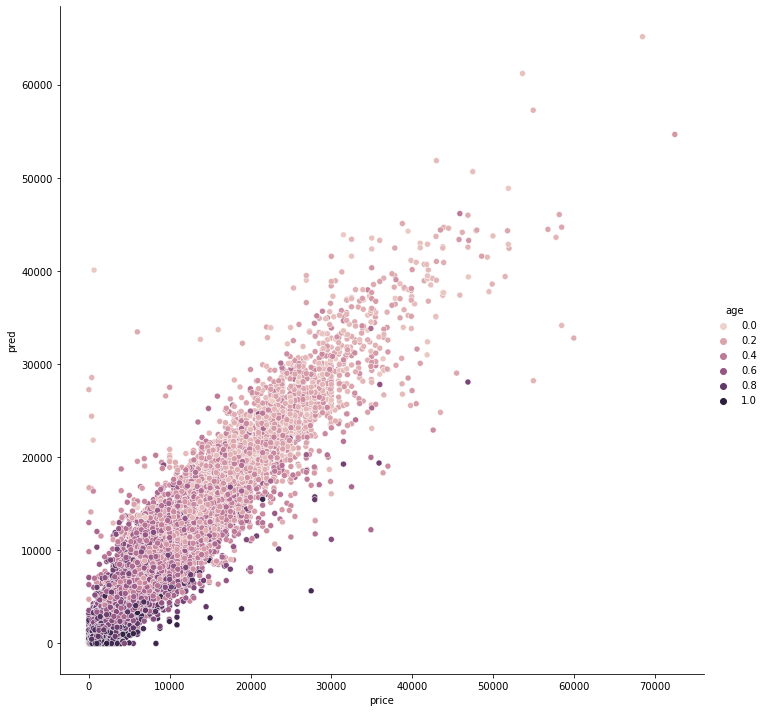

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

bias = np.abs(X_val['pred']-X_val['price'])

sns.relplot(data=X_val, x='price', y='pred', hue='age', height=10, aspect=1)

